## Tutorial 7

## CSC420 - Fall 2021

## Babak Taati

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# install OpenCV
!pip install opencv-python
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Optical Flow

##let's start with sparse optical flow
here we show it on an image pair.

In [ ]:
!wget https://i.ibb.co/NVtJBFR/Peppa.jpg

--2023-03-01 20:29:42--  https://i.ibb.co/NVtJBFR/Peppa.jpg
Resolving i.ibb.co (i.ibb.co)... 104.243.38.177, 104.243.38.202
Connecting to i.ibb.co (i.ibb.co)|104.243.38.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263181 (257K) [image/jpeg]
Saving to: ‘Peppa.jpg’

Peppa.jpg           100%[===================>] 257.01K  --.-KB/s    in 0.1s    

2023-03-01 20:29:42 (1.69 MB/s) - ‘Peppa.jpg’ saved [263181/263181]



(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f32387f9670>)

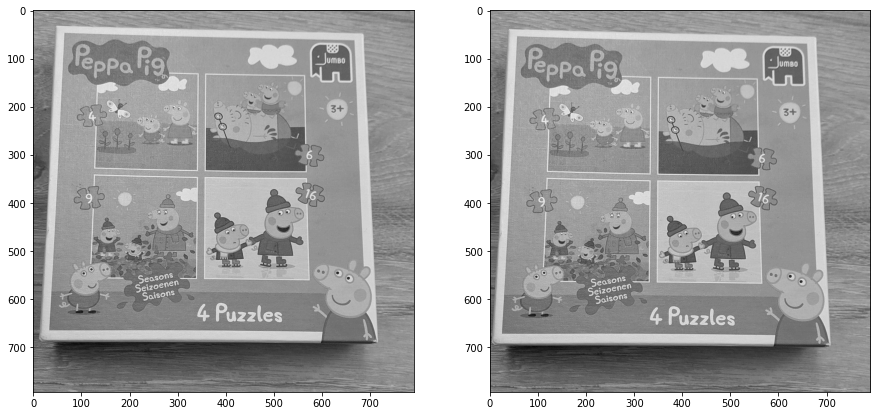

In [ ]:
img = cv2.imread('Peppa.jpg') 

shift1 = 7 
shift2 = -9

# let's first artificially generate a movement
img_prev = img[shift1:,:shift2,:] 
img_current = img[:-shift1,-shift2:,:] 

gray_prev = cv2.cvtColor(img_prev, cv2.COLOR_BGR2GRAY)
gray_current = cv2.cvtColor(img_current, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(gray_prev, cmap='gray')
plt.subplot(1,2,2), plt.imshow(gray_current,cmap='gray')


In [ ]:
gray_current.shape

(793, 791)

In [ ]:
gray_prev.shape

(793, 791)

In [ ]:
img.shape

(800, 800, 3)

In [ ]:
# select 50 corners using the Shi-Tomasi method 
pts_prev = cv2.goodFeaturesToTrack(gray_prev, maxCorners=50, qualityLevel=0.1, minDistance=10)

(([], []), ([], []))

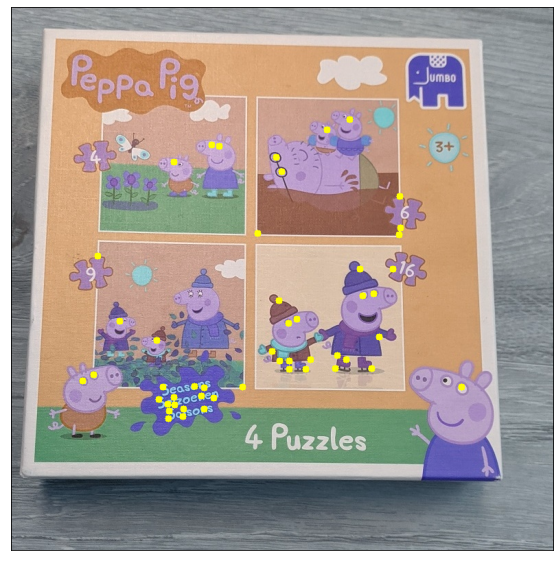

In [ ]:
img_prev_copy = img_prev.copy()

for i in pts_prev:
  x, y = i.ravel()
  cv2.circle(img_prev_copy, (int(x), int(y)), 5, (255,255,0), -1)

plt.figure(figsize=(10,10))
plt.imshow(img_prev_copy)
plt.xticks([]), plt.yticks([])

In [ ]:
# sparse optical flow 
opt_flow_params = dict(winSize=(50,50), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10,0.03))
pts_moved, status, err = cv2.calcOpticalFlowPyrLK(gray_prev, gray_current, pts_prev, None, **opt_flow_params)
# look up SparsePyrLKOpticalFlow and SparseOpticalFlow on OpenCV documentations

In [ ]:
print(pts_prev.shape)
print(pts_moved.shape)

(50, 1, 2)
(50, 1, 2)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f322be79f70>)

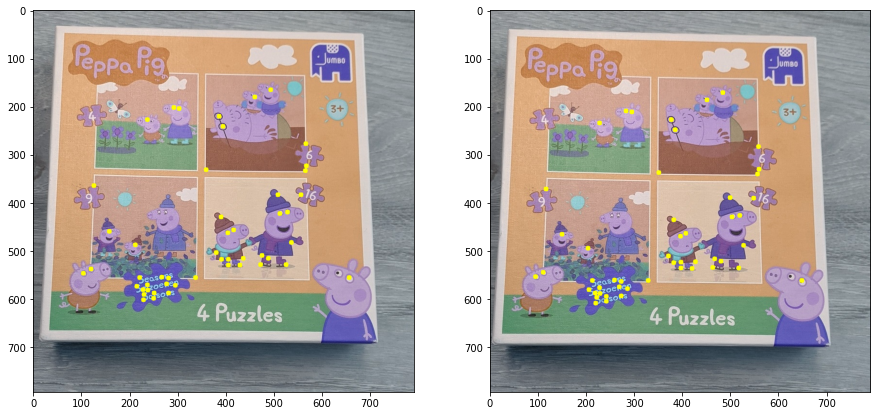

In [ ]:
img_current_copy = img_current.copy()

for i in pts_moved:
  x,y = i.ravel()
  cv2.circle(img_current_copy, (int(x), int(y)), 5, (255,255,0), -1)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img_prev_copy)
plt.subplot(1,2,2), plt.imshow(img_current_copy)

In [ ]:
np.mean(pts_moved - pts_prev, axis=0)

array([[-9.000156 ,  7.0015893]], dtype=float32)

In [ ]:
# mean error (in pixels)
( np.mean(pts_moved - pts_prev, axis=0) - [shift2,shift1] ) 

array([[-0.0001564,  0.0015893]])

## now let's do dense optical flow on the same image pair
Again, here we show it on an image pair. 

In [ ]:
flow = cv2.calcOpticalFlowFarneback(gray_prev, gray_current, None, pyr_scale=0.5, levels=5, winsize=15, iterations=10, poly_n=5, poly_sigma=1.0, flags=cv2.OPTFLOW_FARNEBACK_GAUSSIAN)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f322be27a60>)

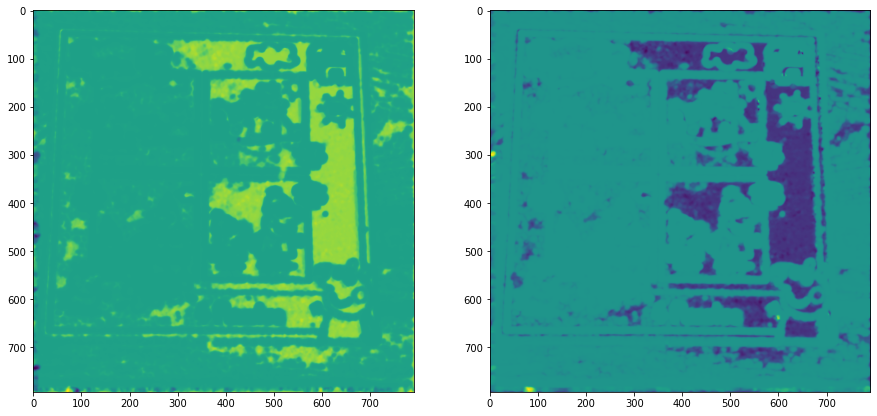

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(flow[:,:,0])
plt.subplot(1,2,2), plt.imshow(flow[:,:,1])

In [ ]:
flow[0:5,0:4,0]

array([[ -0.38232592,  -1.1984386 ,  -2.8534448 ,  -4.9197884 ],
       [ -1.2034905 ,  -3.3163054 ,  -6.3156624 ,  -8.68016   ],
       [ -2.6556082 ,  -6.0368357 ,  -9.16005   , -10.789537  ],
       [ -4.2732587 ,  -8.0964775 , -10.629713  , -11.644331  ],
       [ -5.4184723 ,  -9.109916  , -11.16869   , -11.893164  ]],
      dtype=float32)

hmm ... we were expecting them all to be around 7. what's going on?

In [ ]:
flow[0:5,0:4,1]

array([[0.07732642, 0.2681936 , 0.7011213 , 1.3313419 ],
       [0.23058063, 0.71872747, 1.5184472 , 2.307216  ],
       [0.5113008 , 1.3104867 , 2.1974995 , 2.8528569 ],
       [0.8521845 , 1.7962087 , 2.5819495 , 3.101166  ],
       [1.1408554 , 2.1006262 , 2.7909782 , 3.243527  ]], dtype=float32)

In [ ]:
np.median(flow[:,:,0])

-8.92297

that was better!

In [ ]:
np.median(flow[:,:,1])

6.939002